# Find relation between location and latent representations

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import umap
import os
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from dca import dca
from scipy.spatial.distance import pdist, squareform
import matplotlib.patches as patches

/home/vafeidis/.conda/envs/behavior/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/vafeidis/.conda/envs/behavior/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/vafeidis/.conda/envs/behavior/lib/python3.11/site-packages/uma

In [2]:
from ava.models.vae import X_SHAPE, VAE
import torch

In [3]:
%matplotlib inline

In [4]:
# Fontsize appropriate for plots
SMALL_SIZE = 12
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)     # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)     # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)     # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)   # fontsize of the figure title

## Combined file

In [5]:
root = '/mnt/labNAS/usv_calls/usv_note_analysis/03_div_cage_group01_18_song_empty'

In [6]:
file_dir = 'all detections file'
filename = 'locations_latents_all.csv'
locations_latents_all = pd.read_csv(os.path.join(root,file_dir,filename))
locations_latents_all

,Unnamed: 0,start,end,duration,maxfreq,maxamp,meanfreq,cvfreq,in_song,usvseg_index,...,22,23,24,25,26,27,28,29,30,31
0,0.0,0.499500,0.573000,43.500000,33.518,-74.43,33.371,0.0732,False,0.0,...,-0.321951,-0.004976,-0.009897,1.071670,-0.048639,0.014466,-0.004134,-0.351411,0.035195,-0.008947
1,1.0,0.599500,0.680400,51.000000,35.249,-73.59,38.586,0.2041,False,1.0,...,0.716621,-0.006194,-0.003253,1.243603,-0.055185,-0.005874,0.004700,-0.595085,0.042283,0.004533
2,2.0,0.664900,0.741900,47.000000,24.462,-65.25,27.155,0.1779,False,0.0,...,-0.149974,-0.040295,0.002160,1.758230,-0.038398,-0.068613,-0.005556,-0.312204,0.076351,0.004217
3,3.0,0.699400,0.781400,52.000000,26.710,-67.75,36.812,0.3191,False,2.0,...,1.128774,-0.019966,0.004840,1.402047,-0.060514,-0.014199,0.022991,-0.611689,0.057459,0.004964
4,4.0,0.801900,0.870900,39.000000,26.129,-58.83,31.683,0.2641,False,3.0,...,-0.687927,-0.004163,0.010576,1.201925,-0.041650,-0.019108,-0.000796,-0.507738,0.073795,0.005437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21832,NaN,3784.295589,3784.354581,0.058993,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.110711,-0.127445,-0.078923,-0.920009,-0.028742,-0.014675,0.007098,1.521373,0.120173,-0.008331
21833,NaN,3784.454569,3784.498564,0.043995,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.215791,-0.097987,-0.106544,-1.091271,-0.055277,0.013731,0.021517,1.565341,0.124663,-0.019403
21834,6044.0,3791.947400,3792.024900,47.500000,20.134,-58.69,20.996,0.0575,False,4666.0,...,-0.847291,-0.075674,-0.061599,-0.845709,-0.039407,-0.055683,0.004596,0.194059,0.024943,0.019616
21835,6045.0,3792.486400,3792.543800,27.500000,20.356,-68.72,22.576,0.0815,False,4667.0,...,-0.500720,-0.052311,-0.025521,-0.018938,-0.024468,-0.055605,-0.043400,0.067176,0.037409,-0.005561


## Separate files

In [6]:
file_dir = 'combined detection files'
filename = 'combine_locations_latents.csv'
combined_locations_latents = pd.read_csv(os.path.join(root,file_dir,filename))
origin = {0: 1, 1: 0, 2: 1, 3: 0, 4: 1, 5: 0}
combined_locations_latents['Left'] = combined_locations_latents['code'].map(origin)
combined_locations_latents = combined_locations_latents.drop('detection_side', axis=1)
combined_locations_latents

,Unnamed: 0,start,end,duration,maxfreq,maxamp,meanfreq,cvfreq,in_song,usvseg_index,...,23,24,25,26,27,28,29,30,31,Left
0,0,0.0015,0.0280,26.5,26.663,-53.47,24.876,0.0440,False,0,...,-0.028973,0.128871,-0.061926,0.043403,1.135320,0.982837,0.024404,-0.040607,0.015070,0
1,0,0.0420,0.0865,44.5,34.878,-68.18,56.154,0.4157,False,0,...,0.003740,0.060729,-0.002884,0.041014,-0.057003,-0.709706,0.010344,0.019027,-0.038829,1
2,1,0.1595,0.1945,35.0,22.094,-59.70,26.975,0.1882,False,1,...,-0.027492,-0.008239,-0.003589,-0.020320,0.219507,-1.052270,0.022418,0.015378,-0.070706,1
3,0,0.2020,0.2325,30.5,24.886,-58.15,25.973,0.1807,False,0,...,-0.033171,0.163562,-0.023581,0.045559,1.302552,0.341945,0.069942,-0.041993,-0.033547,1
4,0,0.2360,0.3055,69.5,26.601,-67.33,29.838,0.1162,False,0,...,-0.037439,0.099872,-0.007103,0.043128,0.759220,1.075705,0.038219,0.001714,-0.024612,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91824,5050,4198.6981,4198.7416,43.5,20.121,-57.02,26.009,0.2507,False,5146,...,-0.020951,0.082204,-0.035243,0.042770,0.567271,-0.487524,0.050129,-0.009479,-0.030688,1
91825,5051,4199.0266,4199.0646,38.0,20.525,-64.21,23.540,0.1668,False,5147,...,-0.014628,0.029553,-0.032151,0.031963,0.327283,0.287396,0.018957,0.010186,-0.001035,1
91826,5052,4199.2586,4199.2941,35.5,25.658,-56.56,27.506,0.1768,False,5148,...,-0.053755,0.049655,-0.020758,0.004541,1.414605,-0.457554,0.056677,-0.011643,-0.034671,1
91827,5053,4199.3456,4199.3721,26.5,24.092,-53.31,27.606,0.2244,False,5149,...,-0.059265,0.126881,-0.031839,0.035109,0.923807,-0.128833,0.097889,-0.038811,-0.107659,1


In [ ]:
song_dir = 'song detection files'
filename_song = 'song_locations_latents.csv'
song_locations_latents = pd.read_csv(os.path.join(root,song_dir,filename_song))
side = {'l':1, 'r':0}
song_locations_latents['Left'] = song_locations_latents['source'].map(side)
song_locations_latents = song_locations_latents.drop('source', axis=1)
song_locations_latents

In [ ]:
locations_latents_all = pd.concat([combined_locations_latents,song_locations_latents],axis=0)
locations_latents_all

## Fit UMAP

In [7]:
#locations_latents_all = combined_locations_latents
latents = locations_latents_all.iloc[:,-32:]
latents

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,-0.444413,-0.068796,0.019867,0.004896,-0.112710,-0.021696,0.006856,0.026765,0.466714,-0.008059,...,-0.321951,-0.004976,-0.009897,1.071670,-0.048639,0.014466,-0.004134,-0.351411,0.035195,-0.008947
1,-0.361747,-0.052678,0.020286,0.010781,-0.208633,-0.052298,0.006089,0.034626,0.248262,-0.009741,...,0.716621,-0.006194,-0.003253,1.243603,-0.055185,-0.005874,0.004700,-0.595085,0.042283,0.004533
2,0.262894,-0.087700,0.052388,0.026285,0.296551,-0.061815,0.049550,0.032414,0.138628,-0.042505,...,-0.149974,-0.040295,0.002160,1.758230,-0.038398,-0.068613,-0.005556,-0.312204,0.076351,0.004217
3,-0.301541,-0.057079,0.020412,0.002893,-0.734212,-0.066064,0.007412,0.046114,0.224889,-0.012919,...,1.128774,-0.019966,0.004840,1.402047,-0.060514,-0.014199,0.022991,-0.611689,0.057459,0.004964
4,-1.559752,-0.078535,0.045238,0.000786,0.003122,-0.038871,0.041082,0.035756,0.324561,-0.048924,...,-0.687927,-0.004163,0.010576,1.201925,-0.041650,-0.019108,-0.000796,-0.507738,0.073795,0.005437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21832,-0.150430,-0.073959,0.091809,-0.019210,-1.638502,0.029576,0.017005,0.036875,-1.293412,-0.064374,...,-0.110711,-0.127445,-0.078923,-0.920009,-0.028742,-0.014675,0.007098,1.521373,0.120173,-0.008331
21833,-0.184971,-0.084169,0.075257,-0.003179,-2.151803,0.026579,0.012770,0.074946,-0.710397,-0.056463,...,-0.215791,-0.097987,-0.106544,-1.091271,-0.055277,0.013731,0.021517,1.565341,0.124663,-0.019403
21834,1.218073,-0.066497,0.020548,0.029020,-1.137237,0.017310,-0.025721,0.045674,-0.692654,-0.061453,...,-0.847291,-0.075674,-0.061599,-0.845709,-0.039407,-0.055683,0.004596,0.194059,0.024943,0.019616
21835,0.330739,-0.059126,0.042853,-0.000864,-0.092397,-0.001019,0.013647,0.005028,-1.241493,-0.035127,...,-0.500720,-0.052311,-0.025521,-0.018938,-0.024468,-0.055605,-0.043400,0.067176,0.037409,-0.005561


In [8]:
# try umap
transform = umap.UMAP(n_components=2, metric='euclidean', random_state=42)
embedding = transform.fit_transform(latents)

## Visualize distances on latent space

In [9]:
# compute distance
l_x = locations_latents_all['l_5_x']
r_x = locations_latents_all['r_5_x']
l_y = locations_latents_all['l_5_y']
r_y = locations_latents_all['r_5_y']
locations_latents_all['dist'] = np.sqrt((l_x-r_x)**2 + (l_y-r_y)**2)/1e3

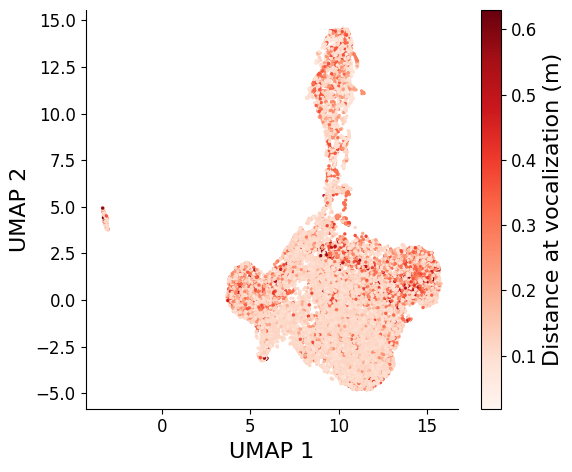

In [10]:
# Downsample
np.random.seed(42)  # Setting a seed for reproducibility
ratio = 1
n_data = len(embedding)
n_sampl = int(n_data/ratio)
idx_plot = np.random.choice(n_data, size=n_sampl, replace=False)

# Plot
fig, ax = plt.subplots(figsize=(6,5))
sc = ax.scatter(embedding[idx_plot,0], embedding[idx_plot,1], c=locations_latents_all['dist'][idx_plot], s=2, cmap='Reds')
cbar = plt.colorbar(sc,label='Distance at vocalization (m)')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
#plt.savefig('UMAP_dis_all.eps',bbox_inches='tight',format='eps',dpi=300)
plt.show()

In [11]:
x = embedding[:,0]
y = embedding[:,1]

# Define the grid resolution
grid_resolution = 40  # You can adjust this value based on your preferences

# Calculate the grid cell indices for each data point
x_bins = np.linspace(min(x), max(x), grid_resolution)
y_bins = np.linspace(min(y), max(y), grid_resolution)
x_digital = np.digitize(x, x_bins)
y_digital = np.digitize(y, y_bins)

# Calculate the average value of the continuous variable for each grid cell
grid_values = np.zeros((grid_resolution, grid_resolution))
grid_counts = np.zeros((grid_resolution, grid_resolution))

for i in range(len(x)):
    ix = x_digital[i] - 1
    iy = y_digital[i] - 1
    grid_values[ix, iy] += locations_latents_all['dist'].iloc[i]
    grid_counts[ix, iy] += 1
    
grid_values[grid_counts==0] = np.nan

grid_average = grid_values / np.maximum(grid_counts, 1)  # Avoid division by zero

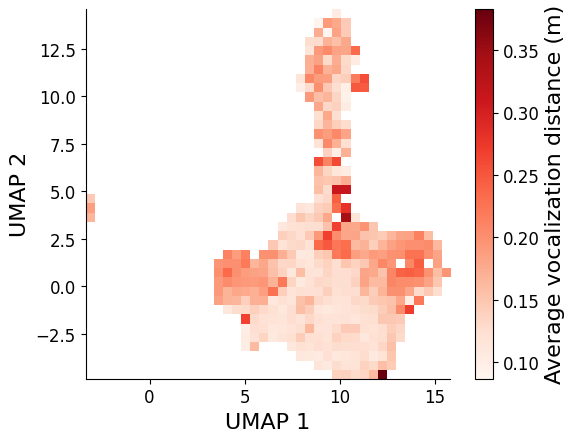

In [12]:
plt.imshow(grid_average.T, origin='lower', extent=[min(x), max(x), min(y), max(y)], cmap='Reds')
plt.colorbar(label='Average vocalization distance (m)')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

Text(0, 0.5, 'Count')

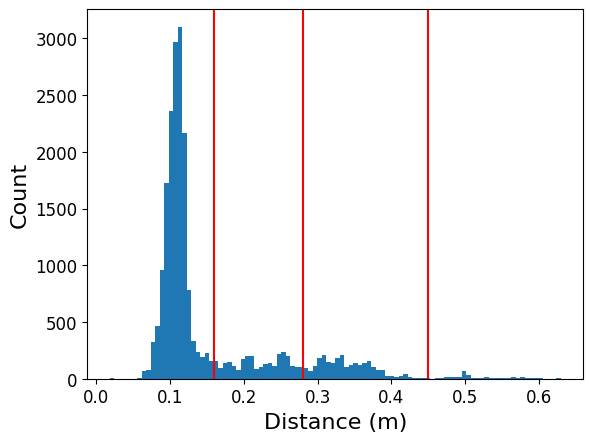

In [13]:
_ = plt.hist(locations_latents_all['dist'],100)
plt.axvline(.16,c='red')
plt.axvline(.28,c='red')
plt.axvline(.45,c='red')
plt.xlabel('Distance (m)')
plt.ylabel('Count')

Text(0.5, 1.0, 'Only for songs')

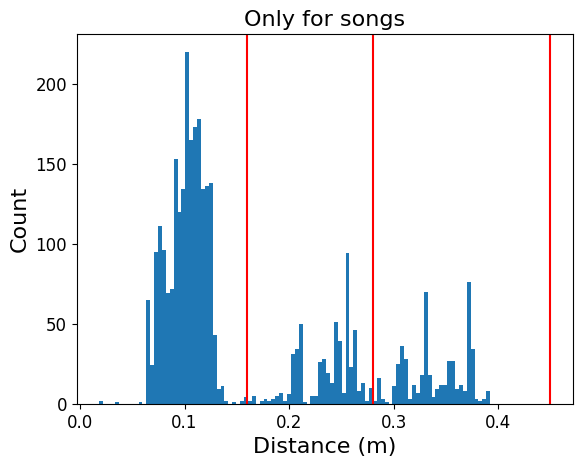

In [14]:
_ = plt.hist(locations_latents_all[locations_latents_all['song_idx'].notna()]['dist'],100)
plt.axvline(.16,c='red')
plt.axvline(.28,c='red')
plt.axvline(.45,c='red')
plt.xlabel('Distance (m)')
plt.ylabel('Count')
plt.title('Only for songs')

Text(0.5, 1.0, 'Only USVs')

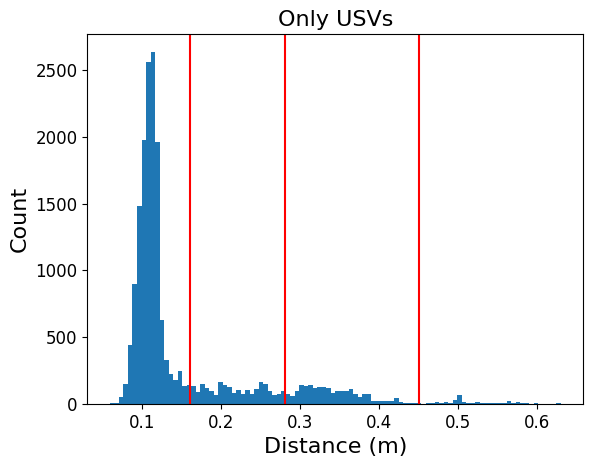

In [15]:
_ = plt.hist(locations_latents_all[~locations_latents_all['song_idx'].notna()]['dist'],100)
plt.axvline(.16,c='red')
plt.axvline(.28,c='red')
plt.axvline(.45,c='red')
plt.xlabel('Distance (m)')
plt.ylabel('Count')
plt.title('Only USVs')

In [16]:
# Turn distance to categorical using specified thresholds
thresholds = np.array([0, 160, 280, 450, 650])/1e3
labels = [1, 2, 3, 4]
locations_latents_all['dist_cat'] = pd.cut(locations_latents_all['dist'], bins=thresholds, labels=labels, right=False)

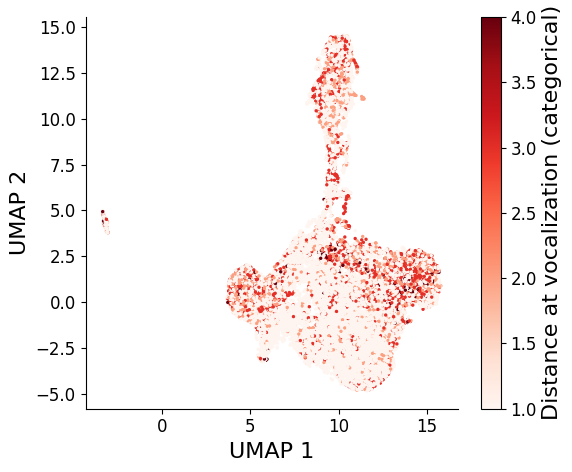

In [17]:
fig, ax = plt.subplots(figsize=(6,5))
sc = ax.scatter(embedding[idx_plot,0], embedding[idx_plot,1], c=locations_latents_all['dist_cat'][idx_plot], s=2, cmap='Reds')
cbar = plt.colorbar(sc,label='Distance at vocalization (categorical)')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

## Split detections left and right

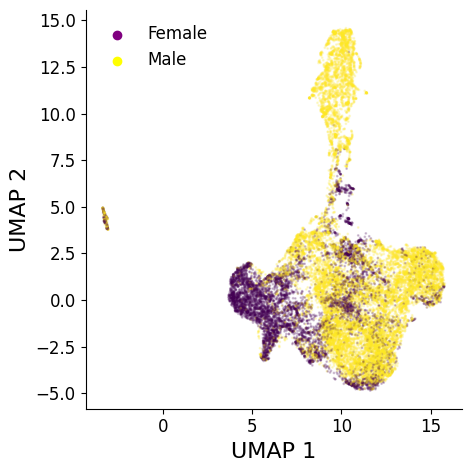

In [18]:
fig, ax = plt.subplots(figsize=(5,5))
sc = ax.scatter(embedding[:,0], embedding[:,1], c=locations_latents_all['Left'], s=1, alpha=.2, cmap='viridis')
ax.scatter([], [], color='purple', label='Female')
ax.scatter([], [], color='yellow', label='Male')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(frameon=False)
plt.tight_layout()
plt.show()

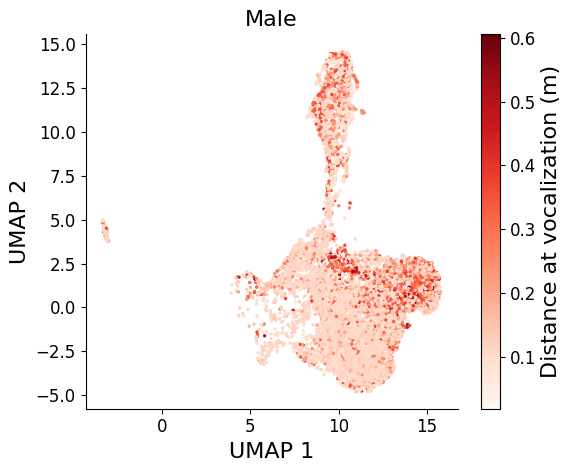

In [19]:
male = locations_latents_all['Left']==1
idxs = idx_plot[male[idx_plot]]

fig, ax = plt.subplots(figsize=(6,5))
sc = ax.scatter(embedding[idxs,0], embedding[idxs,1], c=locations_latents_all['dist'][idxs], s=2, cmap='Reds')
cbar = plt.colorbar(sc,label='Distance at vocalization (m)')
ax.set_title('Male')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
#plt.savefig('UMAP_dis_18_male.eps',bbox_inches='tight',format='eps',dpi=300)
plt.show()

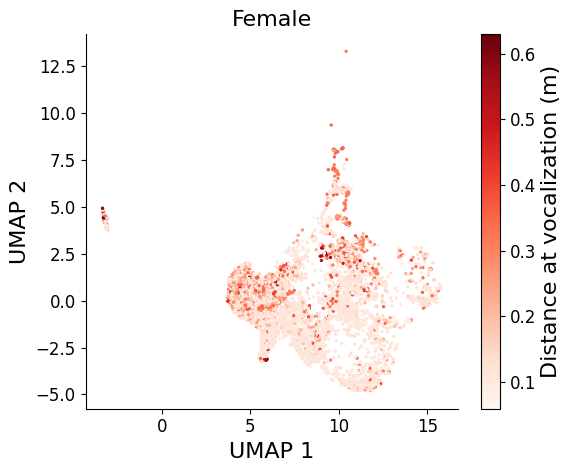

In [20]:
female = locations_latents_all['Left']==0
idxs = idx_plot[female[idx_plot]]

fig, ax = plt.subplots(figsize=(6,5))
sc = ax.scatter(embedding[idxs,0], embedding[idxs,1], c=locations_latents_all['dist'][idxs], s=2, cmap='Reds')
cbar = plt.colorbar(sc,label='Distance at vocalization (m)')
ax.set_title('Female')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
#plt.savefig('UMAP_dis_18_female.eps',bbox_inches='tight',format='eps',dpi=300)
plt.show()

## Perform PCA

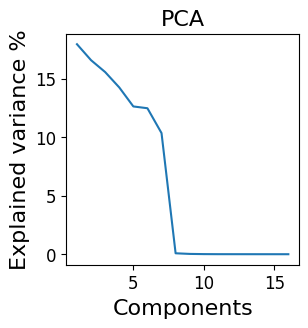

In [21]:
n_comp = 32
show = n_comp//2

# Fit PCA
pca = PCA(n_components=n_comp)
pca.fit(latents)

# Access the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(3, 3))
plt.plot(np.arange(1,show+1),100*explained_variance_ratio[:show])
plt.xlabel('Components')
plt.ylabel('Explained variance %')
plt.title('PCA')
#plt.savefig('scree_plot.eps',bbox_inches='tight',format='eps',dpi=300)
plt.show()

## Load VAE

In [22]:
# Define model
model_filename = os.path.join(root, 'checkpoint_200.tar')
model = VAE(save_dir=root)
model.load_state(model_filename)

## Explore first 2 PCs

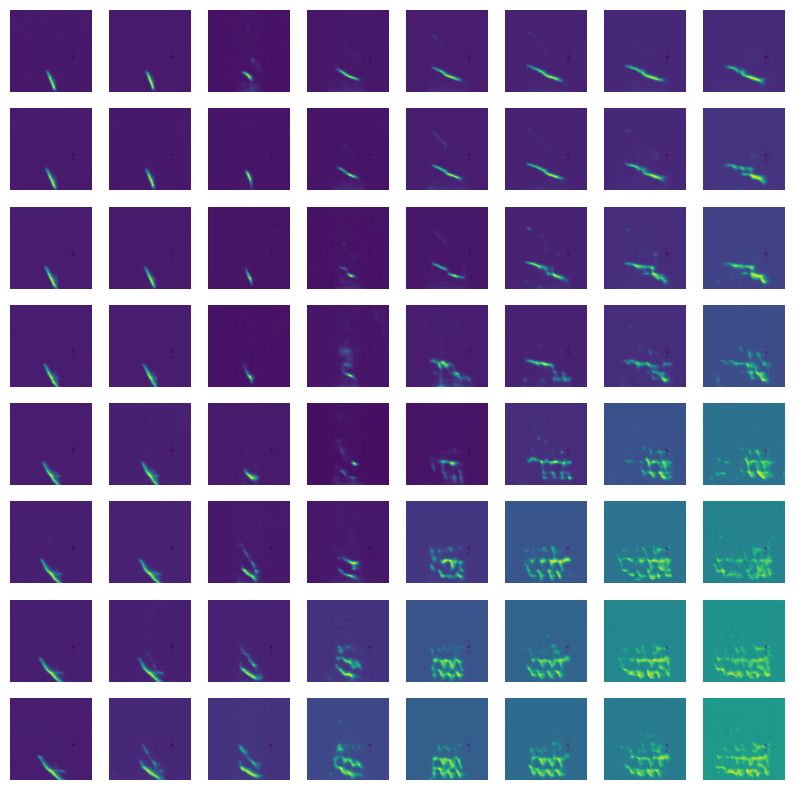

In [23]:
# Sweep space spanned by first 2 PCs

PC1, PC2 = pca.components_[[0,1]]

proj_1 = pca.transform(latents)[:, 0]
proj_2 = pca.transform(latents)[:, 1]

# Get the minimum and maximum values of PC1 and PC2 from the transformed data
#pc1_min, pc1_max = np.min(proj_1), np.max(proj_1)
#pc2_min, pc2_max = np.min(proj_2), np.max(proj_2)
pc1_min, pc1_max = -3, 4
pc2_min, pc2_max = -3, 3

# Define the ranges for weights corresponding to PC1 and PC2
weight_range_pc1 = np.linspace(pc1_min, pc1_max, 8)
weight_range_pc2 = np.linspace(pc2_min, pc2_max, 8)

# Plot the reconstructions in the 2D grid
plt.figure(figsize=(10, 10))
for i in range(weight_range_pc1.size):
    for j in range(weight_range_pc2.size):
        plt.subplot(weight_range_pc2.size, weight_range_pc1.size, j * weight_range_pc1.size + i + 1)
        combo = pca.mean_ + weight_range_pc1[i]*PC1 + weight_range_pc2[j]*PC2
        combo = torch.from_numpy(combo).to('cuda').to(torch.float32)
        combo_spec = model.decode(combo).cpu().detach().numpy().reshape((X_SHAPE[0],X_SHAPE[1]))
        plt.imshow(np.flipud(combo_spec))
        plt.axis('off')

#plt.tight_layout()
#plt.savefig('PCA_grid.eps',bbox_inches='tight',format='eps',dpi=300)
plt.show()

In [24]:
locations_latents_all['PC1'] = proj_1
locations_latents_all['PC2'] = proj_2

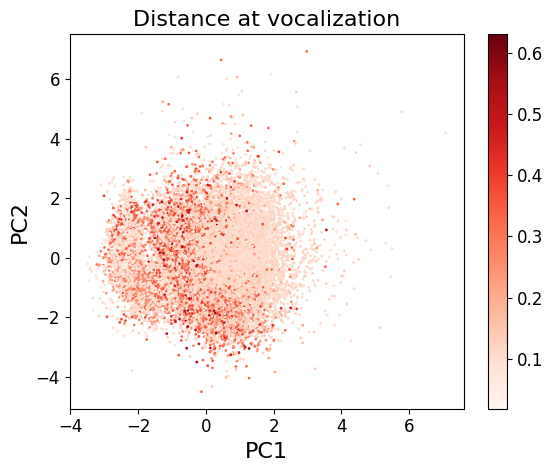

In [25]:
fig, ax = plt.subplots(figsize=(6,5))
sc = ax.scatter(locations_latents_all['PC1'],locations_latents_all['PC2'], c=locations_latents_all['dist'], s=1, cmap='Reds')
cbar = plt.colorbar(sc)
ax.set_title('Distance at vocalization')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'PC1 coefficients')

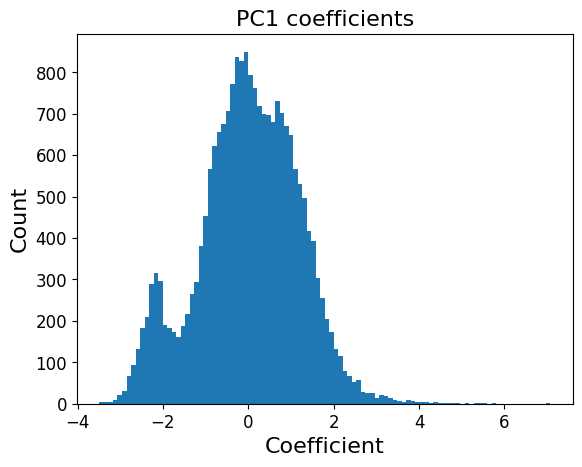

In [26]:
_ = plt.hist(locations_latents_all['PC1'],100)
plt.xlabel('Coefficient')
plt.ylabel('Count')
plt.title('PC1 coefficients')

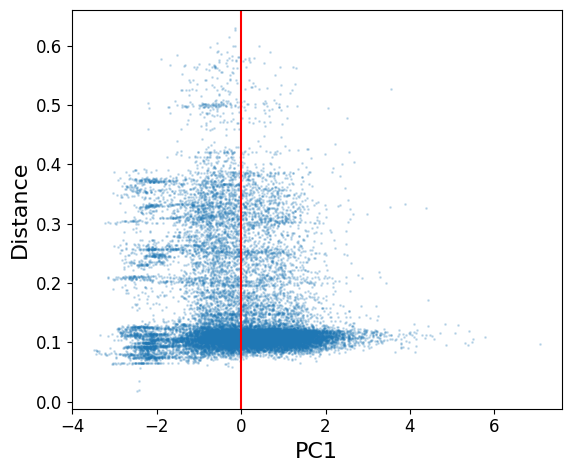

In [27]:
fig, ax = plt.subplots(figsize=(6,5))
sc = ax.scatter(locations_latents_all['PC1'], locations_latents_all['dist'], s=1, alpha=.2)
ax.axvline(0,c='red')
ax.set_xlabel('PC1')
ax.set_ylabel('Distance')
plt.tight_layout()
plt.show()

## Regress PCs against distance

In [28]:
# Data
n_comp = 7

projections = pca.transform(latents)
X = projections[:,:n_comp]
y = locations_latents_all['dist'].values

# Filter out nans
mask = ~np.isnan(y)  # Create a mask where y is not NaN
X = X[mask]
y = y[mask]

In [29]:
# Create the linear regression model
regressor = LinearRegression()

# Fit the model to the data
regressor.fit(X, y)
regressor.score(X, y)

0.054627436718452826

In [30]:
# Get the coefficients and the intercept
coefficients = regressor.coef_
intercept = regressor.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [-0.01502462 -0.00695221  0.00362384 -0.00031707 -0.00246028 -0.00494716
 -0.00592044]
Intercept: 0.15534967579765274


## Visualize direction that correlates most with distance

In [31]:
# Find direction
coeff_norm = coefficients/np.linalg.norm(coefficients)
PCs = pca.components_[:n_comp]
direction = -np.dot(coeff_norm,PCs)

In [32]:
c = np.dot(PC1,direction)/np.linalg.norm(PC1)/np.linalg.norm(direction) # -> cosine of the angle
angle = np.arccos(np.clip(c, -1, 1)) # if you really want the angle
np.degrees(angle)

36.88793551971764

/tmp/ipykernel_1294596/3946497108.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_trill = cm.get_cmap('cool', n_plot)


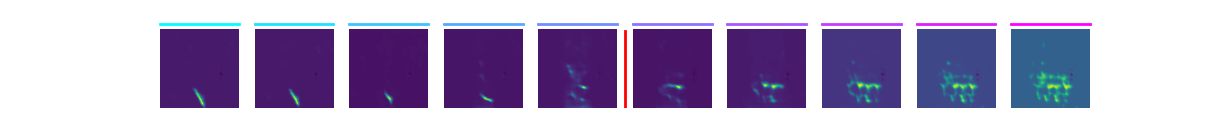

In [33]:
# Plot reconstructed latents across that direction
n_plot = 10

loadings = np.dot(latents,direction)
#dir_min, dir_max = np.min(loadings), np.max(loadings)
dir_min, dir_max = -3, 4
midpoint = (dir_min+dir_max)/2

# Define the ranges for weights
weight_range = np.linspace(dir_min, dir_max , n_plot)

# Initialize the colormap
cmap_trill = cm.get_cmap('cool', n_plot)

# Plot the reconstructions
axs_cond = []
fig, ax = plt.subplots(1, n_plot, figsize=(12, 2))
for i in range(weight_range.size):
    combo = pca.mean_ + weight_range[i]*direction
    combo = torch.from_numpy(combo).to('cuda').to(torch.float32)
    combo_spec = model.decode(combo).cpu().detach().numpy().reshape((X_SHAPE[0],X_SHAPE[1]))
    ax[i].imshow(np.flipud(combo_spec))
    ax[i].axis('off')
    # Overbar
    ax_pos = ax[i].get_position()
    axs_cond.append(fig.add_axes([0,ax_pos.y1,1,.1]))
    plt.axis('off')
    axs_cond[i].axhline(y=.25, xmin=ax_pos.x0, xmax=ax_pos.x1, color=cmap_trill(i), linewidth = 2)

# Vertical line
ax_pos = ax[n_plot//2-1].get_position()
vert_pos = (ax_pos.x1 + ax[n_plot//2].get_position().x0)/2
axs_cond.append(fig.add_axes([vert_pos-.1021,ax_pos.y0,.2,.48]))
plt.axis('off')
axs_cond[-1].axvline(x=vert_pos, ymin=0, ymax=.8, color='red', linewidth = 2)
    
#plt.tight_layout()
#plt.savefig('trilliness_axis.eps',bbox_inches='tight',format='eps',dpi=300)
plt.show()

/tmp/ipykernel_870669/1123128192.py:31: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


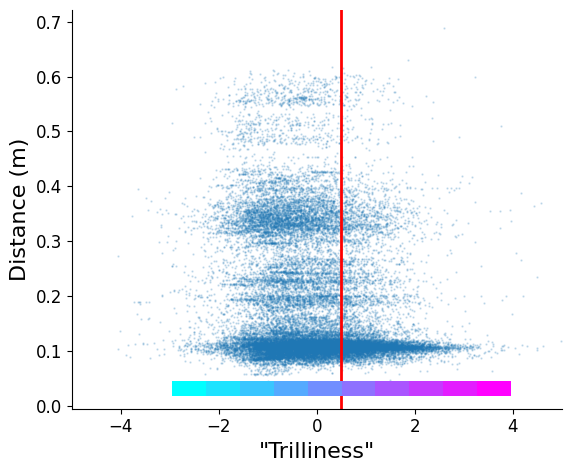

In [34]:
# direction vs distance plot
fig, ax = plt.subplots(figsize=(6,5))
sc = ax.scatter(loadings, locations_latents_all['dist'], s=.5, alpha=.2)
ax.set_xlabel('"Trilliness"')
ax.set_ylabel('Distance (m)')
#ax.set_title('Regression')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlim([-5,5])

# Create a ScalarMappable with a defined colormap
norm = plt.Normalize(vmin=0, vmax=1)
scalar_mappable = cm.ScalarMappable(norm=norm, cmap=cmap_trill)

# Create a new set of axes for the colorbar (inset axes)
fig = plt.gcf()  # Get the current figure
cax = fig.add_axes([0.31, 0.18, 0.565, 0.03])  # [left, bottom, width, height]

# Create the horizontal colorbar
cbar = plt.colorbar(scalar_mappable,cax=cax,orientation='horizontal',cmap=cmap_trill,alpha=1)

# Hide colorbar ticks and tick labels
cbar.set_ticks([])
cbar.set_ticklabels([])

# Remove boundaries around the colorbar
cbar.outline.set_visible(False)

ax.axvline(midpoint,c='red',linewidth = 2)

plt.tight_layout()
#plt.savefig('trill_dist.eps',bbox_inches='tight',format='eps',dpi=300)
plt.show()

## Try the same with DCA

In [83]:
# sample
num_samples = int(1e4)
idx_train = np.random.choice(len(y), size=num_samples, replace=False)
X_sampl = X[idx_train]
y_sampl = y[idx_train]

In [84]:
# Run DCA

Xs = [X_sampl.T]
Ds = [squareform(pdist(y_sampl[:,np.newaxis]))]
# Xs.append(y_sampl[np.newaxis,:])

U, dcovs = dca(Xs, Ds=Ds, num_stoch_batch_samples = 100, num_dca_dimensions = n_comp)

dca dimension 1
step 1: dcov = 0.018403844978262127
     batches:
...................................................................................................
step 2: dcov = 0.016681659165134834
     batches:
...................................................................................................
step 3: dcov = 0.02665595119863504
     batches:
...................................................................................................
step 4: dcov = 0.026753299693707277
     batches:
...................................................................................................
step 5: dcov = 0.03129953244650698
     batches:
...................................................................................................
step 6: dcov = 0.018899397821029708
     batches:
...................................................................................................
step 7: dcov = 0.034397477697034856
     batches:
....................................

...................................................................................................
step 26: dcov = 0.02273899068574729
     batches:
...................................................................................................
step 27: dcov = 0.012656294180744595
     batches:
...................................................................................................
step 28: dcov = 0.019852994314199214
     batches:
...................................................................................................
step 29: dcov = 0.02580349879213369
     batches:
...................................................................................................
step 30: dcov = 0.015597775575267207
     batches:
...................................................................................................

dca dimension 3
step 1: dcov = 0.010905714173217868
     batches:
................................................................................

...................................................................................................
step 14: dcov = 0.010370967738084767
     batches:
...................................................................................................
step 15: dcov = 0.010520077853475232
     batches:
...................................................................................................
step 16: dcov = 0.00828075883252378
     batches:
...................................................................................................
step 17: dcov = 0.011500952854785983
     batches:
...................................................................................................
step 18: dcov = 0.009779346441140578
     batches:
...................................................................................................
step 19: dcov = 0.014313173737303491
     batches:
...............................................................................................

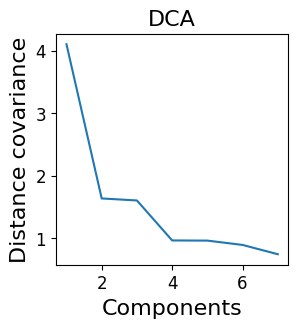

In [85]:
plt.figure(figsize=(3, 3))
plt.plot(np.arange(1,n_comp+1),100*dcovs[0,:])
plt.xlabel('Components')
plt.ylabel('Distance covariance')
plt.title('DCA')
plt.show()

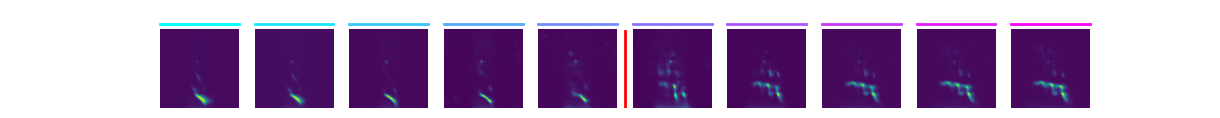

In [87]:
# Find direction
coeff_norm_DCA = -U[0][:,0]
direction_DCA = np.dot(coeff_norm_DCA.T,PCs)

loadings_DCA = np.dot(latents,direction_DCA.T)
#dir_min, dir_max = np.min(loadings), np.max(loadings)
dir_min_DCA, dir_max_DCA = -3, 4
midpoint_DCA = (dir_min_DCA+dir_max_DCA)/2

# Define the ranges for weights
weight_range_DCA = np.linspace(dir_min_DCA, dir_max_DCA , n_plot)

# Plot the reconstructions
axs_cond = []
fig, ax = plt.subplots(1, n_plot, figsize=(12, 2))
for i in range(weight_range.size):
    combo = pca.mean_ + weight_range_DCA[i]*direction_DCA
    combo = torch.from_numpy(combo).to('cuda').to(torch.float32)
    combo_spec = model.decode(combo).cpu().detach().numpy().reshape((X_SHAPE[0],X_SHAPE[1]))
    ax[i].imshow(np.flipud(combo_spec))
    ax[i].axis('off')
    # Overbar
    ax_pos = ax[i].get_position()
    axs_cond.append(fig.add_axes([0,ax_pos.y1,1,.1]))
    plt.axis('off')
    axs_cond[i].axhline(y=.25, xmin=ax_pos.x0, xmax=ax_pos.x1, color=cmap_trill(i), linewidth = 2)
    
# Vertical line
ax_pos = ax[n_plot//2-1].get_position()
vert_pos = (ax_pos.x1 + ax[n_plot//2].get_position().x0)/2
axs_cond.append(fig.add_axes([vert_pos-.1021,ax_pos.y0,.2,.48]))
plt.axis('off')
axs_cond[-1].axvline(x=vert_pos, ymin=0, ymax=.8, color='red', linewidth = 2)

#plt.tight_layout()
plt.show()

In [88]:
c = np.dot(-coeff_norm,coeff_norm_DCA)/np.linalg.norm(coeff_norm)/np.linalg.norm(coeff_norm_DCA) # -> cosine of the angle
angle = np.arccos(np.clip(c, -1, 1)) # if you really want the angle
np.degrees(angle)

13.083710732013309

/tmp/ipykernel_2266407/1163013182.py:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


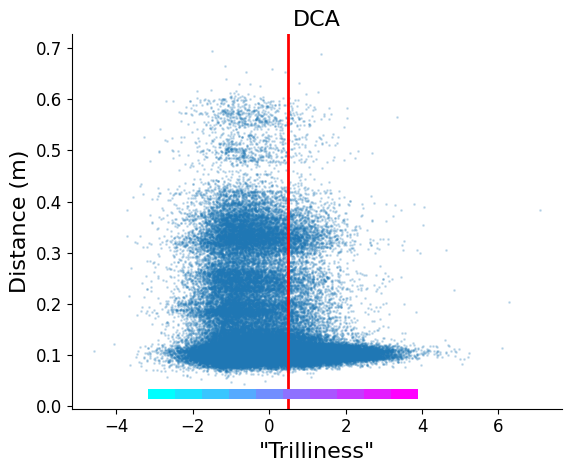

In [89]:
# direction vs distance plot
fig, ax = plt.subplots(figsize=(6,5))
sc = ax.scatter(loadings_DCA, locations_latents_all['dist'], s=1, alpha=.2)
ax.set_xlabel('"Trilliness"')
ax.set_ylabel('Distance (m)')
ax.set_title('DCA')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Create a new set of axes for the colorbar (inset axes)
fig = plt.gcf()  # Get the current figure
cax = fig.add_axes([0.27, 0.175, 0.45, 0.02])  # [left, bottom, width, height]

# Create the horizontal colorbar
cbar = plt.colorbar(scalar_mappable,cax=cax,orientation='horizontal',cmap=cmap_trill,alpha=1)

# Hide colorbar ticks and tick labels
cbar.set_ticks([])
cbar.set_ticklabels([])

# Remove boundaries around the colorbar
cbar.outline.set_visible(False)

ax.axvline(midpoint_DCA,c='red', linewidth = 2)

plt.tight_layout()
plt.show()

## "Trilliness'' plots

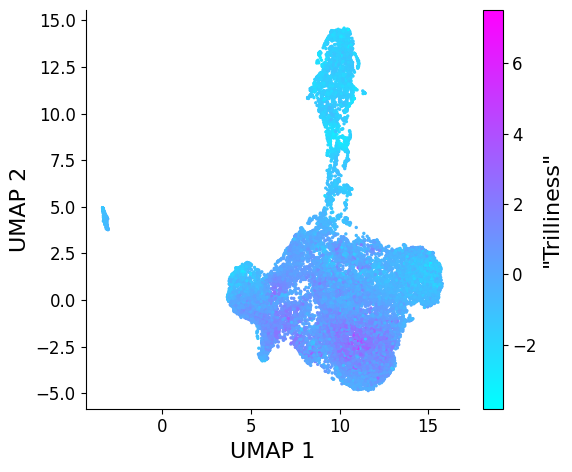

In [34]:
fig, ax = plt.subplots(figsize=(6,5))
sc = ax.scatter(embedding[idx_plot,0], embedding[idx_plot,1], c=loadings[idx_plot], s=2, cmap='cool')
cbar = plt.colorbar(sc,label='"Trilliness"')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
#plt.savefig('UMAP_trill.eps',bbox_inches='tight',format='eps',dpi=300)
plt.show()

In [35]:
# Bin the data on the x-axis
bin_indices = np.digitize(loadings, weight_range)

# Calculate the cumulative distributions for each bin
cumulative_distributions = []
for i in range(n_plot):
    y_bin = locations_latents_all['dist'][bin_indices == i]
    y_bin_sorted = np.sort(y_bin)
    cumulative_dist = np.arange(1, len(y_bin_sorted) + 1) / len(y_bin_sorted)
    cumulative_distributions.append((weight_range[i], y_bin_sorted, cumulative_dist))

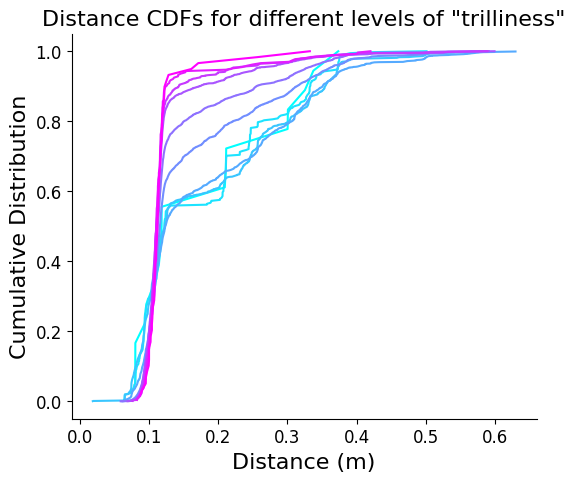

In [36]:
# Plot the cumulative distributions
plt.figure(figsize=(6, 5))
i = 0
for x_bin, y_bin_sorted, cdf in cumulative_distributions:
    plt.plot(y_bin_sorted, cdf, color=cmap_trill(i))
    i+=1
plt.ylabel('Cumulative Distribution')
plt.xlabel('Distance (m)')
plt.title('Distance CDFs for different levels of "trilliness"')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
#plt.savefig('trill_dist_CDF.eps',bbox_inches='tight',format='eps',dpi=300)
plt.show()

In [37]:
# Define the ranges for weights
dis_min, dis_max = 1/15, .6
weight_range_dis = np.linspace(dis_min, dis_max , n_plot)

# Do the same in the other direction
bin_indices_dis = np.digitize(locations_latents_all['dist'], weight_range_dis)

# Calculate the cumulative distributions for each bin
cumulative_distributions_dis = []
for i in range(1,n_plot):
    y_bin = loadings[bin_indices_dis == i]
    y_bin_sorted = np.sort(y_bin)
    cumulative_dist = np.arange(1, len(y_bin_sorted) + 1) / len(y_bin_sorted)
    cumulative_distributions_dis.append((y_bin_sorted, cumulative_dist))

/tmp/ipykernel_1294596/1894796381.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Reds', n_plot)


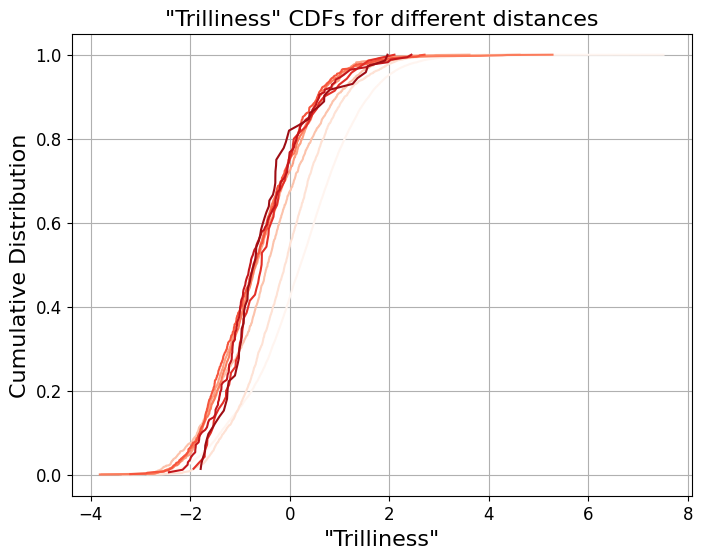

In [38]:
# Initialize the colormap
cmap = cm.get_cmap('Reds', n_plot)

# Plot the cumulative distributions
plt.figure(figsize=(8, 6))
i = 0
for y_bin_sorted, cdf in cumulative_distributions_dis:
    plt.plot(y_bin_sorted, cdf, color=cmap(i))
    i+=1
plt.ylabel('Cumulative Distribution')
plt.xlabel('"Trilliness"')
plt.grid(True)
plt.title('"Trilliness" CDFs for different distances')
plt.show()

In [39]:
distances = np.load(root+'/location data/distances.npy')

counts, bins, _ = plt.hist(distances,100)
plt.axvline(.16,c='red')
plt.axvline(.28,c='red')
plt.axvline(.45,c='red')
plt.xlabel('Distance (m)')
plt.ylabel('Count')

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/labNAS/usv_calls/usv_note_analysis/03_div_cage_group01_18_song_empty/location data/distances.npy'

Text(0.5, 1.0, 'Likelihood of non-trill vocalizations')

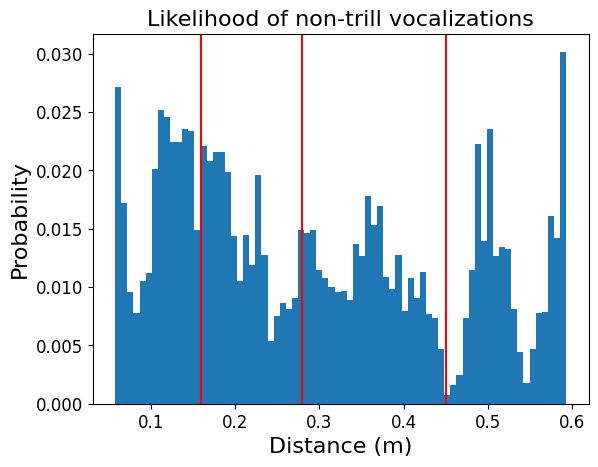

In [96]:
idx_ds = loadings < midpoint
counts_voc, _ = np.histogram(locations_latents_all['dist'][idx_ds],bins=bins)

keep = np.arange(6,80)
    
# Plot the bar plot
plt.bar(bins[keep], counts_voc[keep]/counts[keep], width=bins[1]-bins[0], align='edge')
plt.axvline(.16,c='red')
plt.axvline(.28,c='red')
plt.axvline(.45,c='red')
plt.xlabel('Distance (m)')
plt.ylabel('Probability')
plt.title('Likelihood of non-trill vocalizations')

## Examples plot

In [39]:
# Separate songs from usvs and choose examples
n_song = 3
n_usv = 9
colors = ['yellow','gold', 'orange', 'red', 'limegreen', 'blue', 'mediumorchid', 'teal', 'brown', 'pink', 'olive', 'dodgerblue']

#usvseg_detections.reset_index(drop=True, inplace=True)
song_idx = locations_latents_all.index[locations_latents_all['in_song'].isna()]
usv_idx = locations_latents_all.index[locations_latents_all['song_idx'].isna()]

# Pick examples
np.random.seed(50) #43, 48
song_examples = np.random.choice(song_idx, size=n_song, replace=False)
usv_examples = np.random.choice(usv_idx, size=n_usv, replace=False)
examples = np.concatenate([song_examples,usv_examples])

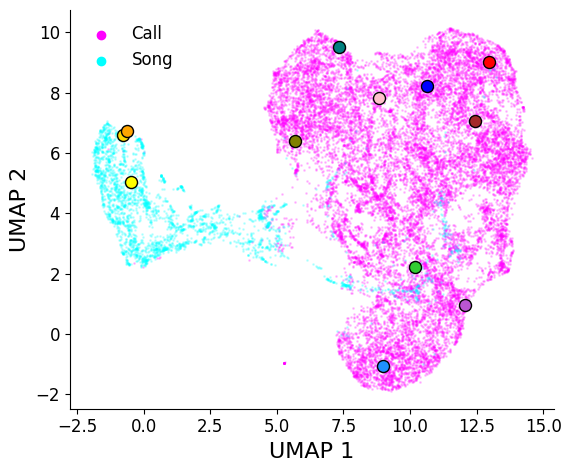

In [40]:
# Plot
fig, ax = plt.subplots(figsize=(6,5))
ax.scatter(embedding[usv_idx,0], embedding[usv_idx,1], c='magenta', s=1, alpha = .2)
ax.scatter(embedding[song_idx,0], embedding[song_idx,1], c='cyan', s=1, alpha = .2)
for i, ex in enumerate(examples):
    ax.scatter(embedding[ex,0], embedding[ex,1], s=75, edgecolor='black', color=colors[i])
ax.scatter([], [], color='magenta', label='Call')
ax.scatter([], [], color='cyan', label='Song')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(frameon=False)
plt.tight_layout()
#plt.savefig('UMAP_call_song.eps',bbox_inches='tight',format='eps',dpi=300)
plt.show()

In [41]:
# Plot reconstructed histograms with color around them

def plot_image_with_border(ax, image, border_color='red', border_size_percent = 10):

    # Calculate the border size as a percentage of the image size.

    # Convert the border size percentage to a value in pixels.
    border_size_pixels = int(min(image.shape[0], image.shape[1]) * border_size_percent / 100)

    # Calculate the border coordinates.
    border_x = [0 - border_size_pixels/1.3, image.shape[1] + border_size_pixels/1.3]
    border_y = [0 - border_size_pixels/1.3, image.shape[0] + border_size_pixels/1.3]

    # Plot the image on the main axis
    ax.imshow(image)

    # Create a rectangle patch for the border
    border_rect = plt.Rectangle((border_x[0], border_y[0]), border_x[1] - border_x[0], border_y[1] - border_y[0],
                                linewidth=border_size_pixels, edgecolor=border_color, fill=False)

    # Add the rectangle patch to the axis
    ax.add_patch(border_rect)

    # Set the axis limits to include the border
    ax.set_xlim(border_x)
    ax.set_ylim(border_y)

    # Remove axis ticks and labels
    ax.axis('off')

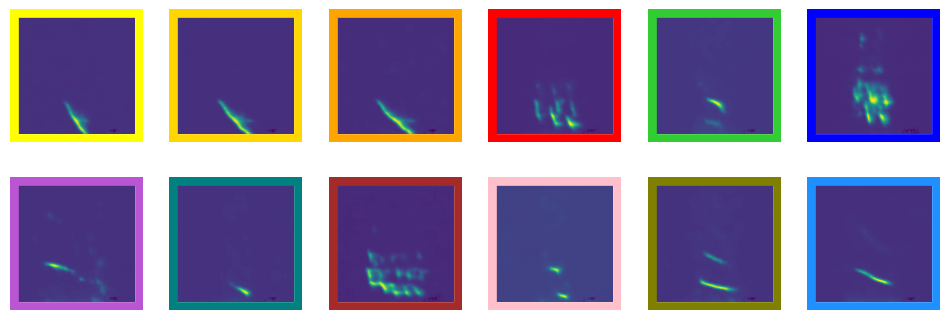

In [42]:
fig, ax = plt.subplots(2, 6, figsize=(12, 4))
for i, ex in enumerate(examples):
    combo = np.array(latents.iloc[ex,:])
    combo = torch.from_numpy(combo).to('cuda').to(torch.float32)
    combo_spec = model.decode(combo).cpu().detach().numpy().reshape((X_SHAPE[0],X_SHAPE[1]))
    j = i // 6
    k = i % 6
    plot_image_with_border(ax[j,k],combo_spec,colors[i], border_size_percent=10)

#plt.tight_layout()
#plt.savefig('examples.eps',bbox_inches='tight',format='eps',dpi=300)
plt.show()